<a href="https://colab.research.google.com/github/rittikcodes/fake_news_detection/blob/development/fake_news_detection_Word2Vec_final_10062024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Import Modules

## Basic Modules

In [3]:
# Data manipulation and analysis
import numpy as np  # For numerical operations, provides support for arrays and matrices
import pandas as pd  # For data manipulation and analysis, offers data structures like DataFrame and Series

# Data visualization
import seaborn as sns  # For statistical data visualization, simplifies creating complex visualizations
import matplotlib.pyplot as plt  # For plotting graphs, provides extensive control over plot styles and formatting
# To display plots inline in Jupyter notebooks
# Ensures plots are displayed inline within Jupyter notebooks
%matplotlib inline

# Machine Learning utilities
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score  # For calculating model accuracy and generating classification reports

# String operations and text processing
import re  # For regular expressions, used for matching and manipulating strings
import string  # For string operations, provides a collection of string constants and functions

# For generating word cloud visualizations
from wordcloud import WordCloud  # For creating word cloud visualizations to display frequent terms in text data

# For natural language processing tasks
import nltk  # Comprehensive library for natural language processing

# Downloading necessary datasets and models from NLTK
nltk.download('wordnet')  # Download WordNet, a lexical database for English
nltk.download('punkt')  # Download the punkt tokenizer for sentence splitting
nltk.download('stopwords')  # Download the stopwords dataset
nltk.download('averaged_perceptron_tagger')  # Download the POS tagger

from nltk.corpus import stopwords, wordnet  # For accessing common stopwords and WordNet lexical database
from nltk.tokenize import word_tokenize, sent_tokenize  # For tokenizing text into words and sentences
from nltk.stem import WordNetLemmatizer  # For lemmatizing words, reducing them to their base form

# Keras for deep learning and NLP preprocessing
from keras.preprocessing.text import Tokenizer  # For tokenizing text data
from keras.preprocessing.sequence import pad_sequences  # For padding sequences to ensure uniform length

# Ignore warnings
import warnings  # For handling warnings
warnings.filterwarnings('ignore')  # To ignore warnings during execution, making the output cleaner


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## Special Modules and Algorithm:
##### 1. gensim -> Word2Vec
##### 2. xgboost

In [4]:
# Machine Learning models
from sklearn.naive_bayes import BernoulliNB  # Naive Bayes classifier for binary/boolean features
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier
from sklearn.linear_model import LogisticRegression  # Logistic regression classifier
import xgboost as xgb  # For using XGBoost classifier
from sklearn.svm import SVC  # Importing Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # Importing K-Nearest Neighbors Classifier
from sklearn import metrics

# Gensim models for word embeddings
from gensim.models import Word2Vec, KeyedVectors  # For working with pre-trained word vectors

# Load pre-trained word vectors from a local file
wv = KeyedVectors.load('/content/drive/MyDrive/fake_news_detection/word2vec.kv')  # Load pre-trained Word2Vec model from local file

# If not download -> loading pre-trained word vectors from Gensim's API
# import gensim.downloader as api  # For downloading datasets and pre-trained models from Gensim's API
# wv = api.load('word2vec-google-news-300')  # Load pre-trained Word2Vec model from Gensim's repository


In [5]:
# check the vetorization of any word
vec_king = wv["king"]
print(vec_king)

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.47265

# Data Collection
##### Data Source:  https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection

In [6]:
# import the datasets
true_news = pd.read_csv('/content/drive/MyDrive/fake_news_detection/True.csv')
fake_news = pd.read_csv('/content/drive/MyDrive/fake_news_detection/Fake.csv')
test_news = pd.read_csv('/content/drive/MyDrive/fake_news_detection/news.csv')

In [7]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
true_news.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [10]:
fake_news.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [11]:
true_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
total_duplicates_true_news = true_news.duplicated().sum()
print('Duplicate true news:', total_duplicates_true_news)
print("------------------------------------------------")
total_duplicates_fake_news = fake_news.duplicated().sum()
print('Duplicate fake news:', total_duplicates_fake_news)

Duplicate true news: 206
------------------------------------------------
Duplicate fake news: 3


In [14]:
true_news.drop_duplicates(inplace=True)
fake_news.drop_duplicates(inplace=True)

# check after reoving duplicate
total_duplicates_true_news = true_news.duplicated().sum()
print('Duplicate true news:', total_duplicates_true_news)
print("------------------------------------------------")
total_duplicates_fake_news = fake_news.duplicated().sum()
print('Duplicate fake news:', total_duplicates_fake_news)

Duplicate true news: 0
------------------------------------------------
Duplicate fake news: 0


In [15]:
# assigning fake news as 0 and true news as 1
fake_news["class"] = 0
true_news["class"] = 1

In [16]:
# Taking the last 10 rows from the fake_news dataset for manual testing
fake_news_manual_testing = fake_news.tail(10)

# Removing the last 10 rows from the fake_news dataset
fake_news.drop(fake_news.tail(10).index, inplace=True)

# Taking the last 10 rows from the true_news dataset for manual testing
true_news_manual_testing = true_news.tail(10)

# Removing the last 10 rows from the true_news dataset
true_news.drop(true_news.tail(10).index, inplace=True)

In [17]:
fake_news_manual_testing.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [18]:
true_news_manual_testing.head()

,title,text,subject,date,class
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [19]:
# concatination of two dataset
data_merge = pd.concat(
    [fake_news, true_news],
    ignore_index = True, # ignore_index = True => While concating it ignores the indexes in both the datasets
    axis = 0) # axis = 0 => row-wise concatination (by default: axis = 0)
data_merge = data_merge.sample(frac=1).reset_index(drop=True) # suffles the rows and resets the index
data_merge.head(10)

,title,text,subject,date,class
0,British police release two men in Parsons Gree...,(Reuters) - British police said they have rele...,worldnews,"September 22, 2017",1
1,China military sets up website to report leaks...,BEIJING (Reuters) - China s military on Sunday...,worldnews,"November 19, 2017",1
2,Death toll from Somalia truck bomb in October ...,MOGADISHU (Reuters) - More than 500 people wer...,worldnews,"November 30, 2017",1
3,Sean Spicer Refused To Define ‘Betrayal’ So T...,"On Tuesday, White House Press Secretary Sean S...",News,"February 1, 2017",0
4,"Leave the past behind, Bulgarian PM tells Balk...",SARAJEVO (Reuters) - Western Balkan countries ...,worldnews,"October 27, 2017",1
5,THIS INTERNATIONAL COMPANY Is Luring Refugees ...,Are you tired of supporting companies who are ...,left-news,"Jan 14, 2016",0
6,Jeb Bush endorsed by former rival Lindsey Grah...,"CHARLESTON, S.C./WASHINGTON (Reuters) - Republ...",politicsNews,"January 15, 2016",1
7,GRAB THE POPCORN! Queen Of Corruption DENIED S...,The Drudge Report has gained access to the rul...,politics,"Sep 24, 2016",0
8,NEW VIDEO…ANTIFA Terror Group INFILTRATED…Tran...,Steven Crowder is an amazing and ALWAYS unafra...,left-news,"Sep 29, 2017",0
9,WATCH “ARCHITECT” OF OBAMACARE Lie And Spin Hi...,"Listening to Zeke Emanuel, awkward brother of ...",politics,"Aug 17, 2016",0


# Exploratory Data Analysis - EDA

In [20]:
data_merge['class'].value_counts()

class
0    23468
1    21201
Name: count, dtype: int64

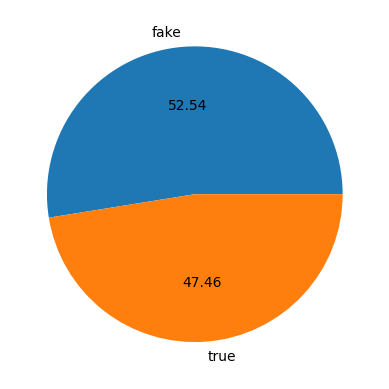

In [21]:
import matplotlib.pyplot as plt
plt.pie(data_merge['class'].value_counts(), labels=['fake','true'],autopct="%0.2f")
plt.show()

In [22]:
data_merge['character_count'] = data_merge['text'].apply(len)

In [23]:
data_merge['word_count'] = data_merge['text'].apply(lambda x: len(word_tokenize(x)))

In [24]:
data_merge['sentence_count'] = data_merge['text'].apply(lambda x: len(sent_tokenize(x)))

In [25]:
data_merge.head()

,title,text,subject,date,class,character_count,word_count,sentence_count
0,British police release two men in Parsons Gree...,(Reuters) - British police said they have rele...,worldnews,"September 22, 2017",1,1103,201,7
1,China military sets up website to report leaks...,BEIJING (Reuters) - China s military on Sunday...,worldnews,"November 19, 2017",1,1227,210,7
2,Death toll from Somalia truck bomb in October ...,MOGADISHU (Reuters) - More than 500 people wer...,worldnews,"November 30, 2017",1,1744,326,13
3,Sean Spicer Refused To Define ‘Betrayal’ So T...,"On Tuesday, White House Press Secretary Sean S...",News,"February 1, 2017",0,3765,690,25
4,"Leave the past behind, Bulgarian PM tells Balk...",SARAJEVO (Reuters) - Western Balkan countries ...,worldnews,"October 27, 2017",1,2228,396,14


In [26]:
data_merge[['character_count', 'word_count', 'sentence_count']].describe()

,character_count,word_count,sentence_count
count,44669.000000,44669.000000,44669.00000
mean,2466.280687,452.967472,14.85115
std,2171.039935,394.659663,12.69114
min,1.000000,0.000000,0.00000
25%,1232.000000,225.000000,7.00000
50%,2184.000000,403.000000,13.00000
75%,3101.000000,571.000000,19.00000
max,51794.000000,9958.000000,321.00000


In [27]:
# fake
data_merge[data_merge['class'] == 0][['character_count', 'word_count', 'sentence_count']].describe()

,character_count,word_count,sentence_count
count,23468.000000,23468.000000,23468.000000
mean,2545.968894,469.781064,14.913329
std,2528.702861,456.380860,13.778696
min,1.000000,0.000000,0.000000
25%,1433.000000,266.000000,7.000000
50%,2166.000000,403.000000,13.000000
75%,3031.250000,562.000000,19.000000
max,51794.000000,9958.000000,288.000000


In [28]:
# true
data_merge[data_merge['class'] == 1][['character_count', 'word_count', 'sentence_count']]

,character_count,word_count,sentence_count
0,1103,201,7
1,1227,210,7
2,1744,326,13
4,2228,396,14
6,2879,579,19
...,...,...,...
44664,1467,281,9
44665,518,105,4
44666,2722,473,16
44667,6888,1280,40


<Axes: xlabel='word_count', ylabel='Count'>

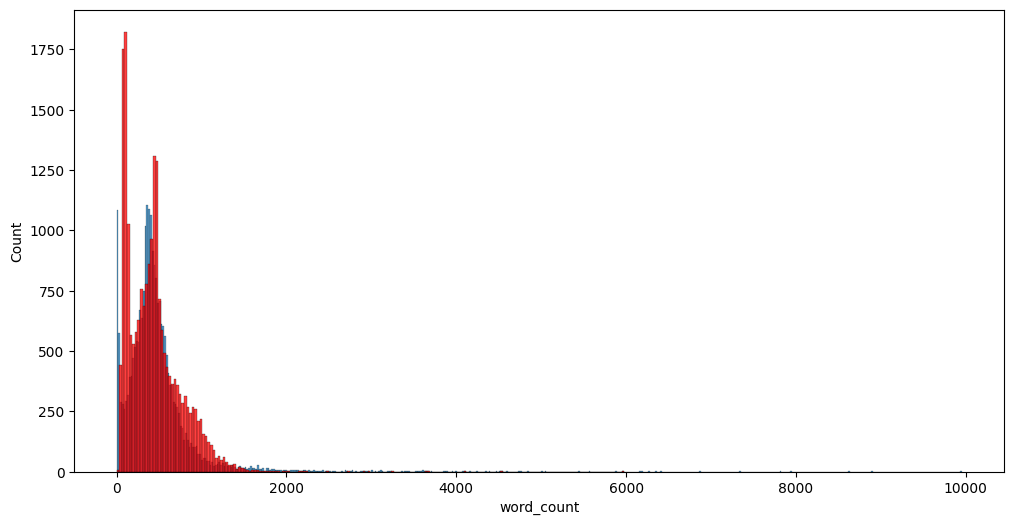

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(data_merge[data_merge['class'] == 0]['word_count'])
sns.histplot(data_merge[data_merge['class'] == 1]['word_count'], color = 'red')

<Axes: xlabel='sentence_count', ylabel='Count'>

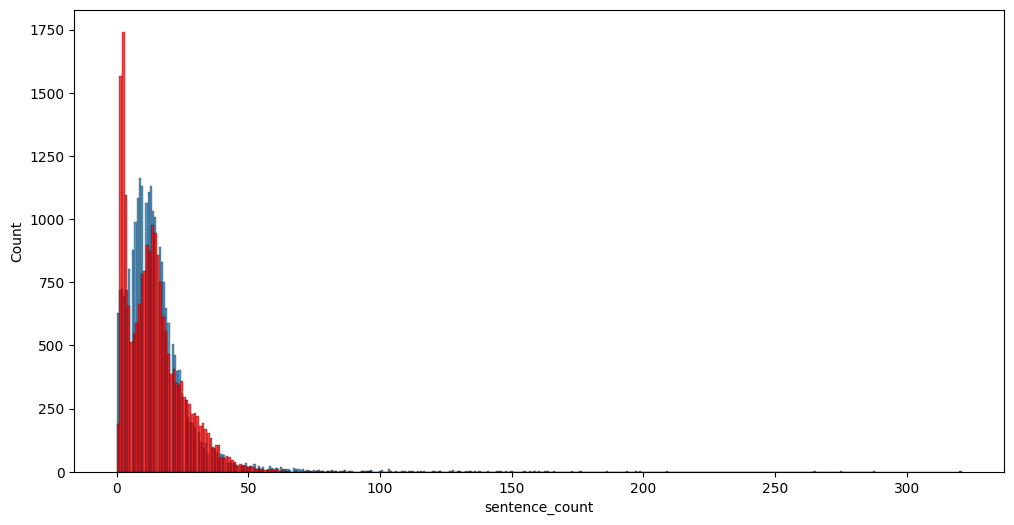

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(data_merge[data_merge['class'] == 0]['sentence_count'])
sns.histplot(data_merge[data_merge['class'] == 1]['sentence_count'], color = 'red')

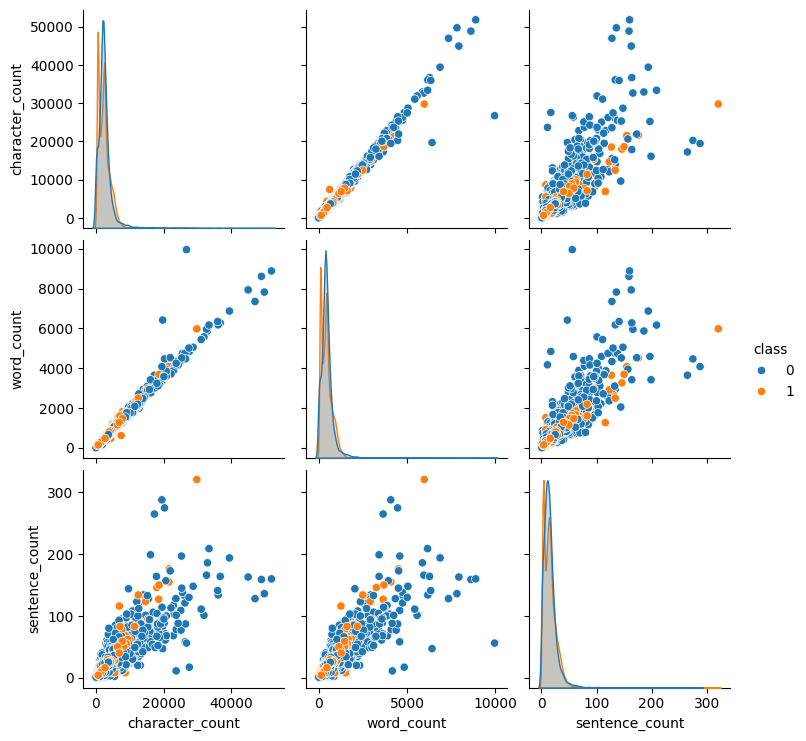

In [31]:
sns.pairplot(data_merge, hue = 'class')

In [32]:
subset = data_merge[['character_count', 'word_count', 'sentence_count', 'class']]

<Axes: >

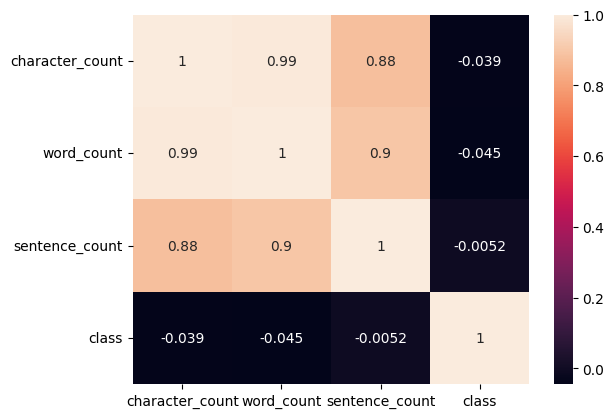

In [33]:
sns.heatmap(subset.corr(),annot=True)

In [34]:
# Convert 'date' column to datetime format
data_merge['date'] = pd.to_datetime(data_merge['date'], format='mixed', dayfirst=True, errors='coerce')

# Extract year from 'date' column
data_merge['year'] = data_merge['date'].dt.year

# Extract month name from 'date' column
data_merge['month'] = data_merge['date'].dt.month_name()

In [35]:
data_merge.head()

,title,text,subject,date,class,character_count,word_count,sentence_count,year,month
0,British police release two men in Parsons Gree...,(Reuters) - British police said they have rele...,worldnews,2017-09-22,1,1103,201,7,2017.0,September
1,China military sets up website to report leaks...,BEIJING (Reuters) - China s military on Sunday...,worldnews,2017-11-19,1,1227,210,7,2017.0,November
2,Death toll from Somalia truck bomb in October ...,MOGADISHU (Reuters) - More than 500 people wer...,worldnews,2017-11-30,1,1744,326,13,2017.0,November
3,Sean Spicer Refused To Define ‘Betrayal’ So T...,"On Tuesday, White House Press Secretary Sean S...",News,2017-02-01,0,3765,690,25,2017.0,February
4,"Leave the past behind, Bulgarian PM tells Balk...",SARAJEVO (Reuters) - Western Balkan countries ...,worldnews,2017-10-27,1,2228,396,14,2017.0,October


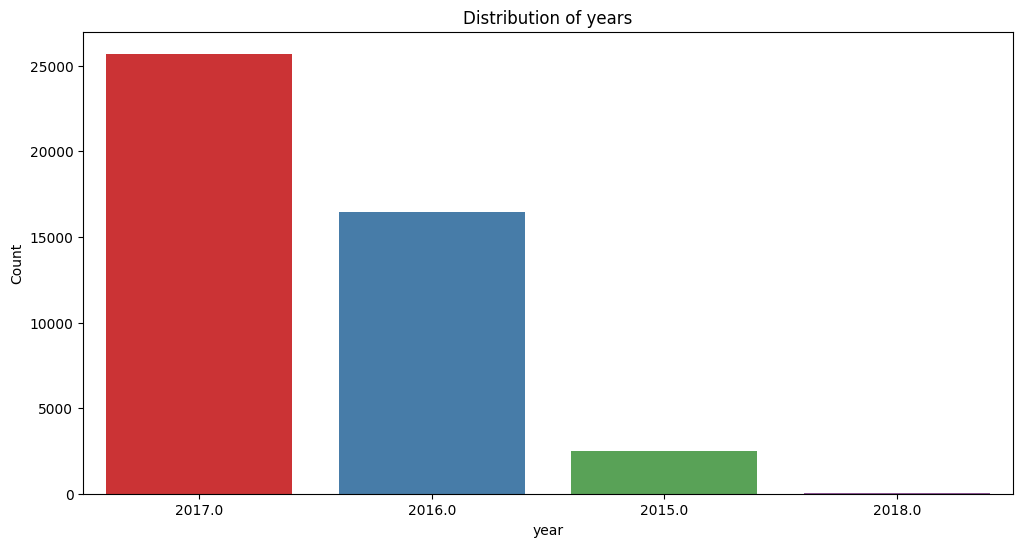

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=data_merge, order=data_merge['year'].value_counts().index, palette='Set1')
plt.title('Distribution of years')
plt.xlabel('year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [37]:
data_merge['subject'] = data_merge['subject'].str.lower()

In [38]:
data_merge.head()

,title,text,subject,date,class,character_count,word_count,sentence_count,year,month
0,British police release two men in Parsons Gree...,(Reuters) - British police said they have rele...,worldnews,2017-09-22,1,1103,201,7,2017.0,September
1,China military sets up website to report leaks...,BEIJING (Reuters) - China s military on Sunday...,worldnews,2017-11-19,1,1227,210,7,2017.0,November
2,Death toll from Somalia truck bomb in October ...,MOGADISHU (Reuters) - More than 500 people wer...,worldnews,2017-11-30,1,1744,326,13,2017.0,November
3,Sean Spicer Refused To Define ‘Betrayal’ So T...,"On Tuesday, White House Press Secretary Sean S...",news,2017-02-01,0,3765,690,25,2017.0,February
4,"Leave the past behind, Bulgarian PM tells Balk...",SARAJEVO (Reuters) - Western Balkan countries ...,worldnews,2017-10-27,1,2228,396,14,2017.0,October


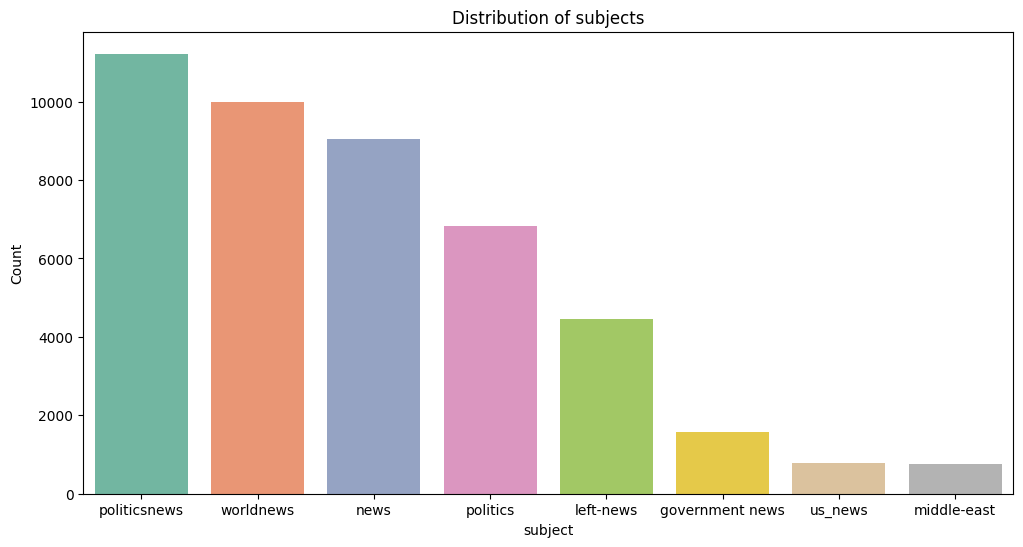

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=data_merge, order=data_merge['subject'].value_counts().index, palette='Set2')
plt.title('Distribution of subjects')
plt.xlabel('subject')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

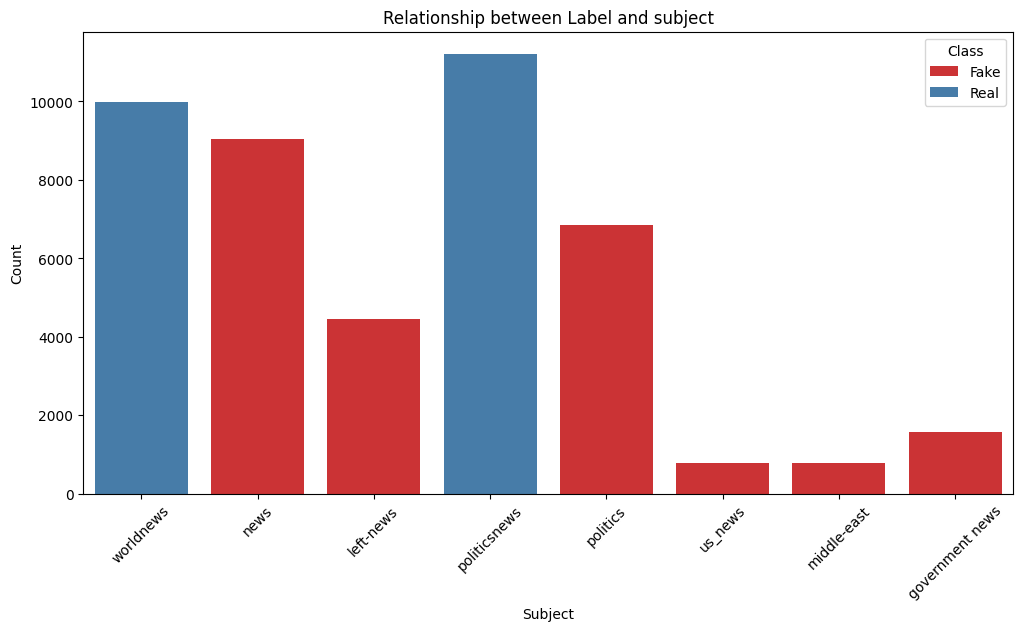

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', hue='class', data=data_merge, hue_order=[0, 1], palette='Set1')

# Set legend labels
plt.legend(title='Class', labels=['Fake', 'Real'])

plt.title('Relationship between Label and subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

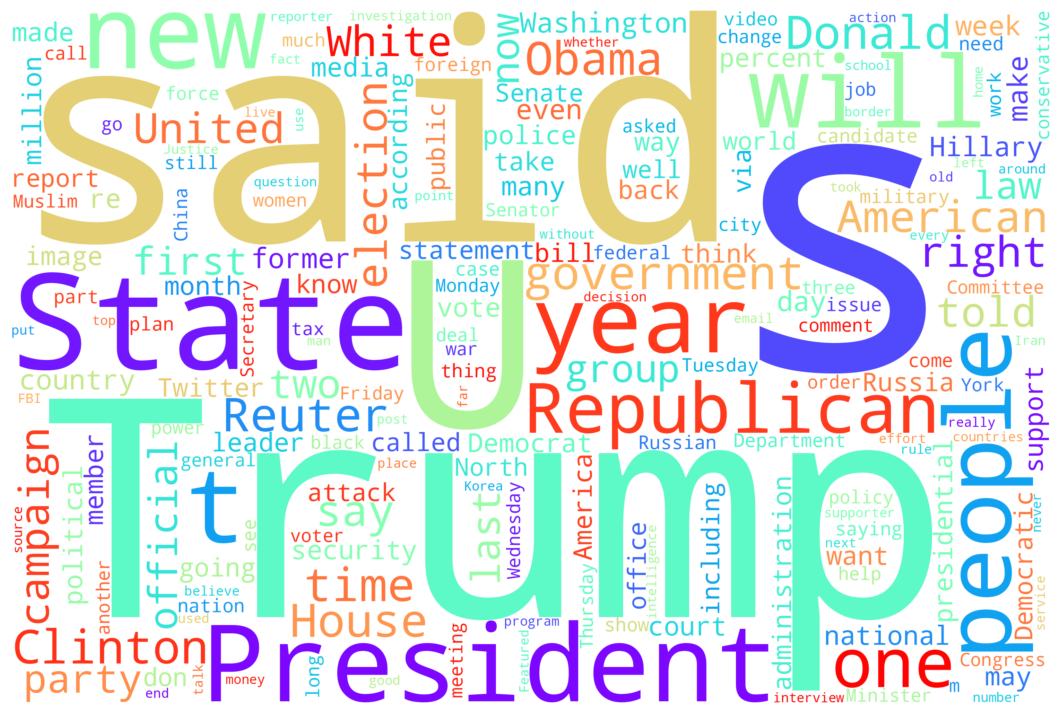

In [41]:
all_words = " ".join([sentence for sentence in data_merge['text']])

wordcloud = WordCloud(
    width=3000,          # Width of the word cloud image
    height=2000,         # Height of the word cloud image
    random_state=1,      # For reproducibility
    background_color='white', # Background color of the word cloud image
    colormap='rainbow',  # Color map to use for the words
    collocations=False,  # Do not include collocations (bigrams)
).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

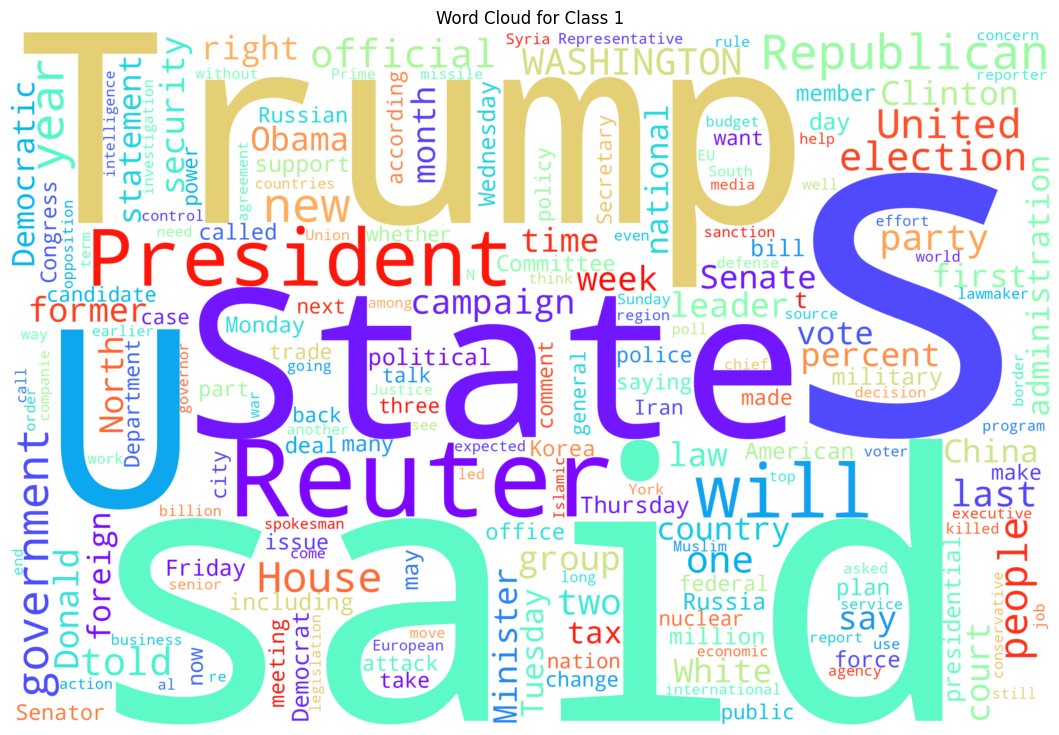

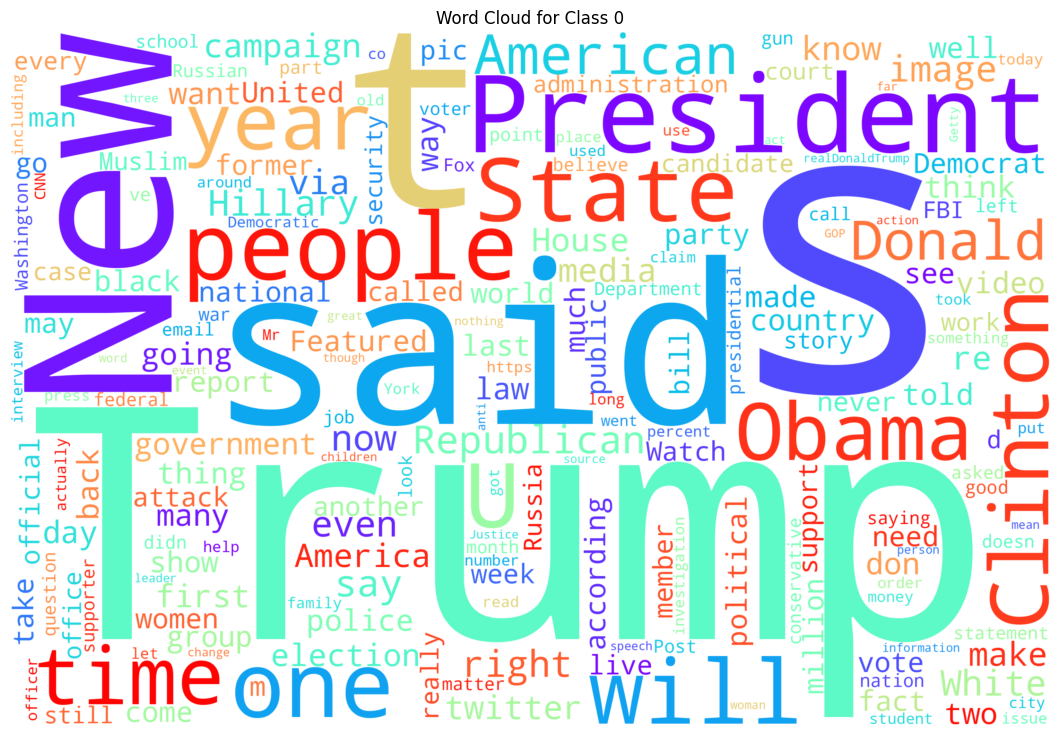

In [42]:
classes = data_merge['class'].unique()

# Plot word clouds for each class separately
for class_value in classes:
    # Filter data for the current class
    class_data = data_merge[data_merge['class'] == class_value]

    # Combine all text entries into a single string
    all_words = " ".join([sentence for sentence in class_data['text'] if isinstance(sentence, str)])

    # Generate the word cloud
    wordcloud = WordCloud(
        width=3000,          # Width of the word cloud image
        height=2000,         # Height of the word cloud image
        random_state=1,      # For reproducibility
        background_color='white', # Background color of the word cloud image
        colormap='rainbow',  # Color map to use for the words
        collocations=False,  # Do not include collocations (bigrams)
    ).generate(all_words)

    # Plot the word cloud
    plt.figure(figsize=(15, 9))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Class {class_value}')
    plt.axis('off')
    plt.show()

# Data Preprocessing

## Data cleaning
##### Checking duplicate values and removing them

## Text Preprocessing

### Lammatize and removing stopwords

In [43]:
stopword = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def wordopt(text):
    text = text.lower()  # Convert each letter to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets and the brackets themselves
    text = re.sub(r'\W', ' ', text)  # Replace non-word characters with spaces
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Replace newline characters with spaces
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing digits (revised regex pattern)

    # Tokenize the text
    words = word_tokenize(text)

    # Lemmatize each word considering its part of speech
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words if word not in stopword]

    text = ' '.join(lemmatized_words)
    return text

# Apply the modified wordopt function to your DataFrame
data_merge["clean_text"] = data_merge["text"].apply(wordopt)

In [44]:
str1 = """This wasn’t a tall run-chase like 2014. No tactical masterstroke like Manvinder Bisla of 2012 fame. But Kolkata Knight Riders’ IPL 2024 title win on Sunday would still taste like ‘mishti doi’ because the title No.3 came after a decade.

Kolkata Knight Riders' Mitchell Starc, Andre Russel and teammates celebrate the dismissal of Sunrisers Hyderabad's Abhishek Sharma in the Indian Premier League 2024 final(ANI)
Kolkata Knight Riders' Mitchell Starc, Andre Russel and teammates celebrate the dismissal of Sunrisers Hyderabad's Abhishek Sharma in the Indian Premier League 2024 final(ANI)
The transformation led by mentor Gautam Gambhir’s return to the Kolkata franchise. Gambhir was captain when KKR last won. This time it was skipper Shreyas Iyer’s turn -- he stayed unbeaten along with Venkatesh Iyer (52*, 26b) in their eight-wicket win at the MA Chidambaram Stadium on Sunday as Sunrisers Hyderabad went down tamely after posting the lowest first innings score in an IPL final – 113.

Unlock exclusive access to the latest news on India's general elections, only on the HT App. Download Now! Download Now!
SRH’s road to the playoffs and their gung-ho approach was set up hugely with the efforts of their dynamic opening southpaws Travis Head and Abhishek Sharma – Travishek as the stadium announcer yelled to get the neutral Chennai fans going. Mitchell Starc took two balls to get rid of his compatriot Head earlier in the week in Qualifier 1. Here, he knocked back Abhishek Sharma’s (2) stumps the fifth ball with arguably the most eye-catching delivery of the competition.

Right in the first over of the contest, the Australia left-armer - his ₹24.5 crore price tag will no longer feel a burden – landed body blows on the super-aggressive SRH batting line-up for two knockout matches in a row.

Abhishek, playing his first IPL final, was nervous after skipper Pat Cummins chose to bat. There was some juice on offer, off the pitch. Starc angled one in from over the wicket and got it to leave the left-hander, so late he had zero reaction time. It’s a kind of fast bowler’s delivery more common in Test cricket. When bowlers get it right in T20s, it creates a spectacle – capacity crowd up in spirits to watch lighted stumps shattering as they suck the life out of one dressing room and lift up the other.

Backing up his senior bowling partner, Vaibhav Arora produced a classic red-ball dismissal – pitched on leg at pace from over the wicket and angling away from Head to catch the edge to the keeper. The man walking back for a first-ball duck had made India’s life miserable in the World Test Championship final and the ODI World Cup title clash. No final heroics for him this time. Not the way Head would have wanted his 567-run season to end.

Rahul Tripathi hung around for a while, but that wasn’t his game. The constant messaging to their batters from the SRH camp was not to compromise on intent. “We are playing a particular style, won’t work every time but when it does, it will be damaging,” Cummins said at the toss. Tripathi (9) attempted to flick another of Starc’s hissing angled balls, only managing to top edge to Ramandeep Singh in front of square.

Arora’s 17-run sixth over when Aiden Markram went after him, gave some element of respectability to the powerplay score – 40/3. But what was to follow was going to leave the orange section – the crowd was equally split between the teams – and SRH’s Chennai-based owners largely disappointed.

SRH were four wickets down at the halfway mark, six-down in 12 overs and the batters could never arrest the slide. KKR bowlers had discovered the bowling mantra on a pitch where there was enough help off the surface for pacers, some grip for off-pace balls and bounce for the spinners. The only way SRH could transfer pressure to their opponents was through some release shots. Nitish Reddy (13) tried to force the pace but Harshit Rana’s 146 kph screamer got him caught behind. Markram (20) holed out trying to pull Andre Russell out of the park.

Such is KKR’s collective bowling strength that there is no respite with spin. This has been Sunil Narine’s season. He wasn’t going to allow the match’s grip to loosen and delivered another top-draw bowling performance (4-0-16-1).

Russell, in the playing eleven for the first time in an IPL final, also left his mark with a spell that read 2.3-0-19-3. Starc wasn’t even required to bowl his final over as SRH folded up in 18.3 overs. But it was the Aussie pace ace’s thrilling opening spell (3-0-14-2) that gave KKR a huge head start."""

wordopt(str1)

'tall run chase like tactical masterstroke like manvinder bisla fame kolkata knight rider ipl title win sunday would still taste like mishti doi title come decade kolkata knight rider mitchell starc andre russel teammate celebrate dismissal sunrisers hyderabad abhishek sharma indian premier league final ani kolkata knight rider mitchell starc andre russel teammate celebrate dismissal sunrisers hyderabad abhishek sharma indian premier league final ani transformation lead mentor gautam gambhir return kolkata franchise gambhir captain kkr last time skipper shreyas iyer turn stayed unbeaten along venkatesh iyer eight wicket win chidambaram stadium sunday sunrisers hyderabad go tamely post low first inning score ipl final unlock exclusive access late news india general election ht app download download srh road playoff gung ho approach set hugely effort dynamic opening southpaw travis head abhishek sharma travishek stadium announcer yell get neutral chennai fan go mitchell starc take two ba

In [45]:
# Combine checks for NaN and non-string values in the 'clean_text' column
problematic_values = data_merge['clean_text'].apply(lambda x: pd.isna(x) or not isinstance(x, str))
print(data_merge[problematic_values])

Empty DataFrame
Columns: [title, text, subject, date, class, character_count, word_count, sentence_count, year, month, clean_text]
Index: []


# Model training

## Tokenization

### Assigning X and y

In [46]:
X = data_merge["clean_text"]
y = data_merge["class"]

### Split the data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Tokenize the text

In [48]:
X_train_tokens = [word_tokenize(text) for text in X_train]
X_test_tokens = [word_tokenize(text) for text in X_test]

In [49]:
X_train_tokens[10]

['geneva',
 'reuters',
 'united',
 'nation',
 'refugee',
 'agency',
 'international',
 'organization',
 'migration',
 'iom',
 'call',
 'trump',
 'administration',
 'saturday',
 'continue',
 'offering',
 'asylum',
 'people',
 'flee',
 'war',
 'persecution',
 'say',
 'resettlement',
 'programme',
 'vital',
 'u',
 'president',
 'donald',
 'trump',
 'friday',
 'put',
 'four',
 'month',
 'hold',
 'allow',
 'refugee',
 'united',
 'state',
 'temporarily',
 'bar',
 'traveler',
 'syria',
 'six',
 'muslim',
 'majority',
 'country',
 'say',
 'move',
 'would',
 'help',
 'protect',
 'american',
 'terrorist',
 'attack',
 'need',
 'refugee',
 'migrant',
 'worldwide',
 'never',
 'great',
 'u',
 'resettlement',
 'program',
 'one',
 'important',
 'world',
 'two',
 'geneva',
 'base',
 'agency',
 'say',
 'joint',
 'statement',
 'trump',
 'stop',
 'entry',
 'traveler',
 'syria',
 'six',
 'nation',
 'iraq',
 'iran',
 'sudan',
 'libya',
 'somalia',
 'yemen',
 'least',
 'day',
 'say',
 'administration',
 'nee

## Vectorization

### TF-IDF Vectorizer

In [50]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate and fit the TfidfVectorizer
vectorization = TfidfVectorizer()
Xv_train = vectorization.fit_transform(X_train_tokens)
Xv_test = vectorization.transform(X_test)
'''

'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n\n# Instantiate and fit the TfidfVectorizer\nvectorization = TfidfVectorizer()\nXv_train = vectorization.fit_transform(X_train_tokens)\nXv_test = vectorization.transform(X_test)\n'

### Word2Vec training

In [51]:
w2v_model = Word2Vec(sentences=X_train_tokens, vector_size=200, window=5, min_count=1, workers=4)

### Function to generate average vectors

In [52]:
def get_average_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

### Generate average vectors for each document

In [53]:
X_train_vectors = [get_average_vector(tokens, w2v_model, 200) for tokens in X_train_tokens]
X_test_vectors = [get_average_vector(tokens, w2v_model, 200) for tokens in X_test_tokens]

In [54]:
X_train_vectors[10]

array([ 0.44923782,  0.19362791,  0.3883366 ,  0.17293638, -0.1299471 ,
       -0.00609235,  0.05569499, -0.42809427,  0.42101333, -0.36043018,
        0.3988504 , -0.0604179 , -0.18575935,  0.04471417, -0.5454363 ,
        0.47337958, -0.3403942 , -0.03655372,  0.21079518, -0.11179338,
       -0.6662885 ,  0.54817116,  0.2495975 ,  0.10326513,  0.10251094,
        0.22410172, -0.44871232,  0.39795044, -0.241979  , -0.33639842,
        0.562636  ,  0.4258373 ,  0.17459287, -0.13072549, -0.40744084,
       -0.29280135, -0.17571011,  0.1731971 , -0.1783715 ,  0.09355689,
       -0.27887493,  0.20793594, -0.04904555,  0.3709071 , -0.02592668,
        0.4746901 , -0.17997974, -0.10955486,  0.36257833,  0.32887292,
        0.06039269,  0.3741402 , -0.31661063,  0.45610645, -0.25690654,
       -0.13246807,  0.10213146, -0.1014128 ,  0.12120327,  0.30057842,
        0.52716744, -0.05117907,  0.08279867,  0.30581638,  0.1960707 ,
        0.13586345, -0.06938585, -0.6458281 ,  0.55155736, -0.52

In [55]:
# Determine the maximum length of vectors
max_length = max(len(vec) for vec in X_train_vectors + X_test_vectors)

# Pad or truncate vectors to the same length
X_train_vectors_padded = pad_sequences(X_train_vectors, maxlen=max_length, dtype='float32', padding='post')
X_test_vectors_padded = pad_sequences(X_test_vectors, maxlen=max_length, dtype='float32', padding='post')


In [56]:
X_train_vectors_padded[10]

array([ 0.44923782,  0.19362791,  0.3883366 ,  0.17293638, -0.1299471 ,
       -0.00609235,  0.05569499, -0.42809427,  0.42101333, -0.36043018,
        0.3988504 , -0.0604179 , -0.18575935,  0.04471417, -0.5454363 ,
        0.47337958, -0.3403942 , -0.03655372,  0.21079518, -0.11179338,
       -0.6662885 ,  0.54817116,  0.2495975 ,  0.10326513,  0.10251094,
        0.22410172, -0.44871232,  0.39795044, -0.241979  , -0.33639842,
        0.562636  ,  0.4258373 ,  0.17459287, -0.13072549, -0.40744084,
       -0.29280135, -0.17571011,  0.1731971 , -0.1783715 ,  0.09355689,
       -0.27887493,  0.20793594, -0.04904555,  0.3709071 , -0.02592668,
        0.4746901 , -0.17997974, -0.10955486,  0.36257833,  0.32887292,
        0.06039269,  0.3741402 , -0.31661063,  0.45610645, -0.25690654,
       -0.13246807,  0.10213146, -0.1014128 ,  0.12120327,  0.30057842,
        0.52716744, -0.05117907,  0.08279867,  0.30581638,  0.1960707 ,
        0.13586345, -0.06938585, -0.6458281 ,  0.55155736, -0.52

In [57]:
test_data_df = pd.DataFrame(columns = ['classification model', 'fake', 'true'])

In [58]:
evaluation_df = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1score'])

## Logistic Regression

In [59]:
# Instantiate the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the logistic regression model
logreg.fit(X_train_vectors_padded, y_train)

# Predict on test data
y_pred_prob = logreg.predict_proba(X_test_vectors_padded)[:, 1]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1score = f1_score(y_test, y_pred, pos_label=0)

# Create a new DataFrame with the metrics
metric_new_row = pd.DataFrame({'model': ['LR'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1score': [f1score]})

# Append the new row to the existing DataFrame of metrics
evaluation_df = pd.concat([evaluation_df, metric_new_row], ignore_index=True)

# Count the classification results
fake_count = np.sum(np.array(y_pred) == 0)
true_count = np.sum(np.array(y_pred) == 1)

# Create a new DataFrame with the test date
test_new_row = pd.DataFrame({'classification model': ['Logistic Regression'],
                             'fake': [fake_count],
                             'true': [true_count]})

# Append the new row to the existing DataFrame of test data
test_data_df = pd.concat([test_data_df, test_new_row], ignore_index=True)

In [60]:
report_log = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n", report_log)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5877
           1       0.98      0.98      0.98      5291

    accuracy                           0.98     11168
   macro avg       0.98      0.98      0.98     11168
weighted avg       0.98      0.98      0.98     11168



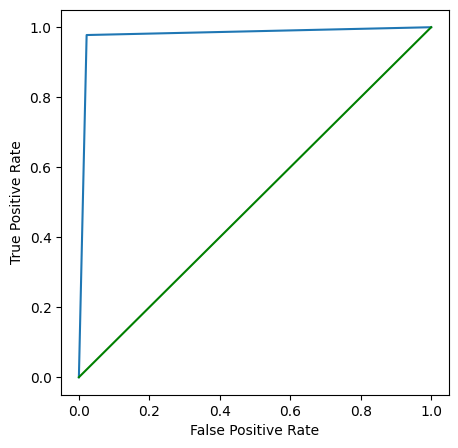

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_pred)

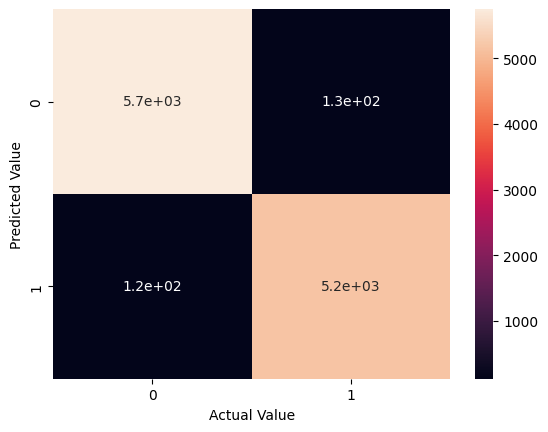

In [62]:
from sklearn import metrics
sns.heatmap (metrics.confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

## Decision Tree Classifier

In [63]:
# Instantiate the decision tree classifier
dt = DecisionTreeClassifier(max_depth=5)

# Train the decision tree classifier
dt.fit(X_train_vectors_padded, y_train)

# Predict on test data
y_pred = dt.predict(X_test_vectors_padded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1score = f1_score(y_test, y_pred, pos_label=0)

# Create a new DataFrame with the metrics
new_row = pd.DataFrame({'model': ['DT'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1score': [f1score]})

# Append the new row to the existing DataFrame
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

# Count the classification results
fake_count = np.sum(np.array(y_pred) == 0)
true_count = np.sum(np.array(y_pred) == 1)

# Create a new DataFrame with the test date
test_new_row = pd.DataFrame({'classification model': ['Decision Tree'],
                             'fake': [fake_count],
                             'true': [true_count]})

# Append the new row to the existing DataFrame of test data
test_data_df = pd.concat([test_data_df, test_new_row], ignore_index=True)

[Text(0.5, 0.9166666666666666, 'x[68] <= 0.506\ngini = 0.499\nsamples = 33501\nvalue = [17591, 15910]'),
 Text(0.25, 0.75, 'x[144] <= 0.002\ngini = 0.27\nsamples = 17651\nvalue = [14806, 2845]'),
 Text(0.125, 0.5833333333333334, 'x[31] <= 0.125\ngini = 0.131\nsamples = 13711\nvalue = [12742, 969]'),
 Text(0.0625, 0.4166666666666667, 'x[27] <= 0.659\ngini = 0.048\nsamples = 10625\nvalue = [10361, 264]'),
 Text(0.03125, 0.25, 'x[31] <= 0.024\ngini = 0.046\nsamples = 10595\nvalue = [10348, 247]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.021\nsamples = 8232\nvalue = [8146, 86]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.127\nsamples = 2363\nvalue = [2202, 161]'),
 Text(0.09375, 0.25, 'x[16] <= -0.167\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.1875, 0.4166666666666667, 'x[14] <= -0.077\ngini = 0.353

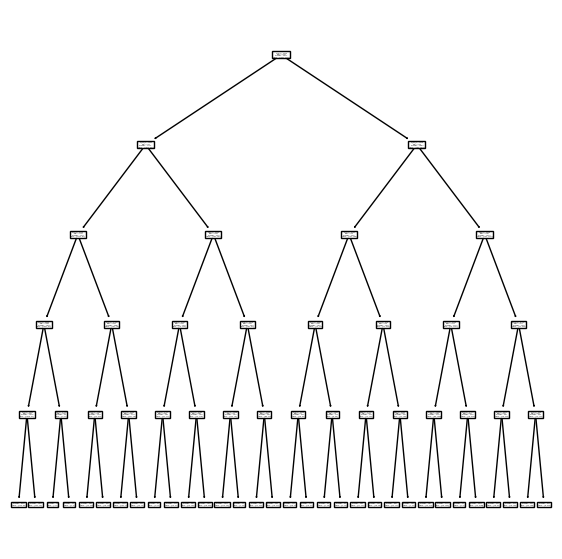

In [64]:
from sklearn import tree
plt.subplots(figsize=(7, 7))
tree.plot_tree(dt)

In [65]:
report_dt = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n", report_dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      5877
           1       0.87      0.92      0.90      5291

    accuracy                           0.90     11168
   macro avg       0.90      0.90      0.90     11168
weighted avg       0.90      0.90      0.90     11168



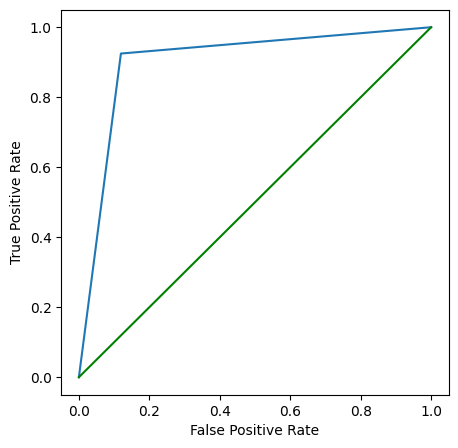

In [66]:
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_pred)

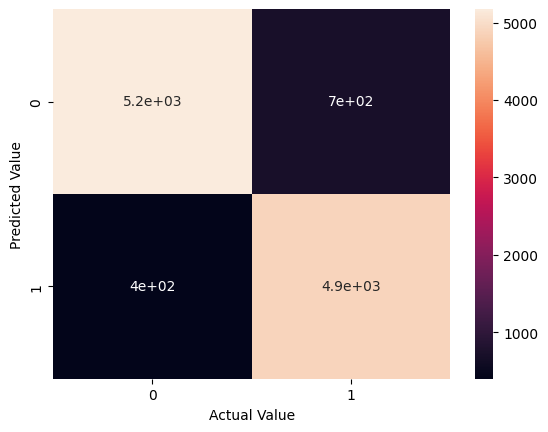

In [67]:
sns.heatmap (metrics.confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

## Naive Bayes Classifier


In [68]:
# Instantiate the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Train the Bernoulli Naive Bayes classifier
bnb.fit(X_train_vectors_padded, y_train)

# Predict on test data
y_pred = bnb.predict(X_test_vectors_padded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1score = f1_score(y_test, y_pred, pos_label=0)

# Create a new DataFrame with the metrics
new_row = pd.DataFrame({'model': ['NB'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1score': [f1score]})

# Append the new row to the existing DataFrame
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

fake_count = np.sum(y_pred == 0)
true_count = np.sum(y_pred == 1)

# Create a new DataFrame with the test data classification counts
test_new_row = pd.DataFrame({'classification model': ['Naive Bayes'],
                             'fake': [fake_count],
                             'true': [true_count]})

# Append the new row to the existing DataFrame of test data
test_data_df = pd.concat([test_data_df, test_new_row], ignore_index=True)

In [69]:
report_dt = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n", report_dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      5877
           1       0.87      0.90      0.89      5291

    accuracy                           0.89     11168
   macro avg       0.89      0.89      0.89     11168
weighted avg       0.89      0.89      0.89     11168



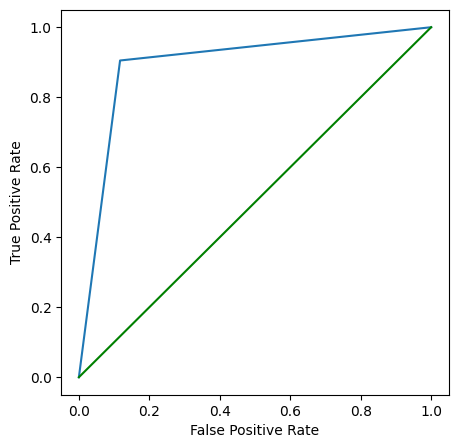

In [70]:
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_pred)

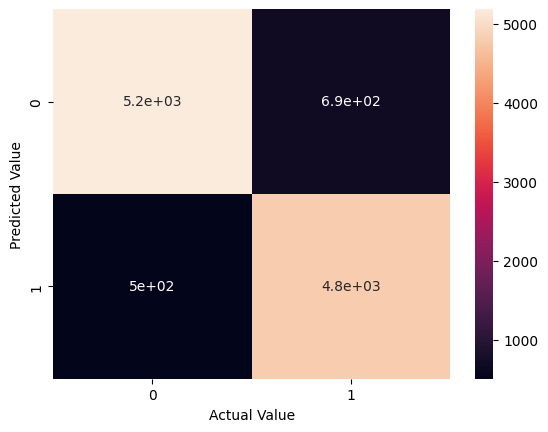

In [71]:
sns.heatmap (metrics.confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

## XGBoost

In [72]:
# Convert to DMatrix format for XGBoost
dtrain = xgb.DMatrix(data=X_train_vectors_padded, label=y_train)
dtest = xgb.DMatrix(data=X_test_vectors_padded, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict on test data
y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1score = f1_score(y_test, y_pred, pos_label=0)

# Create a new DataFrame with the metrics
new_row = pd.DataFrame({'model': ['XGB'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1score': [f1score]})

# Append the new row to the existing DataFrame
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

# Count the classification results
fake_count = np.sum(np.array(y_pred) == 0)
true_count = np.sum(np.array(y_pred) == 1)

# Create a new DataFrame with the test data classification counts
test_new_row = pd.DataFrame({'classification model': ['XGBoost'],
                             'fake': [fake_count],
                             'true': [true_count]})

# Append the new row to the existing DataFrame of test data
test_data_df = pd.concat([test_data_df, test_new_row], ignore_index=True)

In [73]:
report_xgboost = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n", report_xgboost)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      5877
           1       0.97      0.97      0.97      5291

    accuracy                           0.97     11168
   macro avg       0.97      0.97      0.97     11168
weighted avg       0.97      0.97      0.97     11168



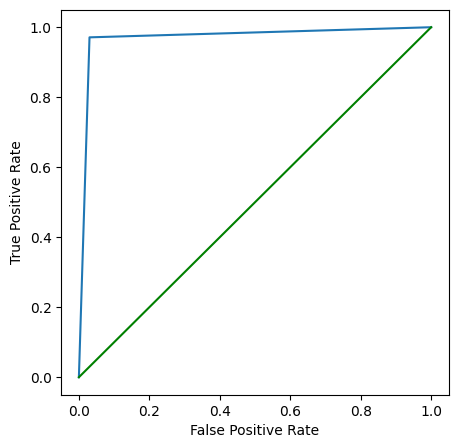

In [74]:
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_pred)

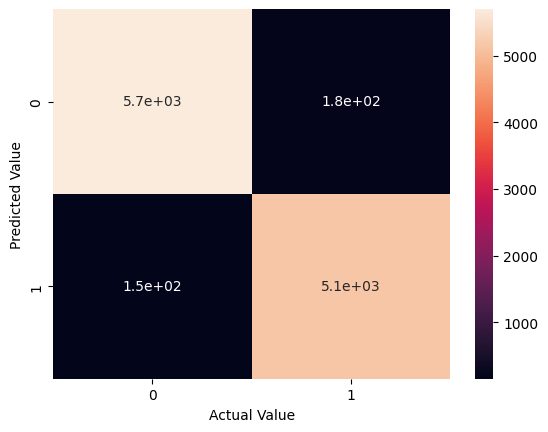

In [75]:
sns.heatmap (metrics.confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

## Support Vector Machine (SVM) Classifier

In [76]:
from sklearn.svm import SVC
# Instantiate the SVM model
svm_model = svc = SVC(kernel='linear')  # Create an instance of SVM with probability estimates enabled

# Train the SVM model
svc.fit(X_train_vectors_padded, y_train)  # Fit the SVM model on the training data

# Predict on test data
y_pred_svc = svc.predict(X_test_vectors_padded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc, pos_label=0)
recall = recall_score(y_test, y_pred_svc, pos_label=0)
f1score = f1_score(y_test, y_pred_svc, pos_label=0)

# Create a new DataFrame with the metrics
new_row = pd.DataFrame({'model': ['SVM'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1score': [f1score]})

# Append the new row to the existing DataFrame
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

# Count the classification results
fake_count = np.sum(y_pred_svc == 0)
true_count = np.sum(y_pred_svc == 1)

# Create a new DataFrame with the test data classification counts
test_new_row = pd.DataFrame({'classification model': ['SVM'],
                             'fake': [fake_count],
                             'true': [true_count]})

# Append the new row to the existing DataFrame of test data
test_data_df = pd.concat([test_data_df, test_new_row], ignore_index=True)

In [77]:
report_svm = metrics.classification_report(y_test, y_pred_svc)
print("Classification Report:\n", report_svm)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5877
           1       0.98      0.98      0.98      5291

    accuracy                           0.98     11168
   macro avg       0.98      0.98      0.98     11168
weighted avg       0.98      0.98      0.98     11168



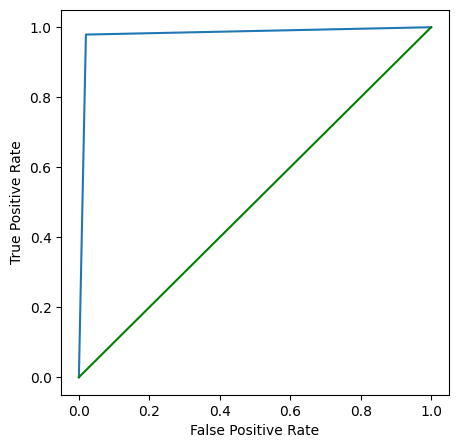

In [78]:
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred_svc)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_pred)

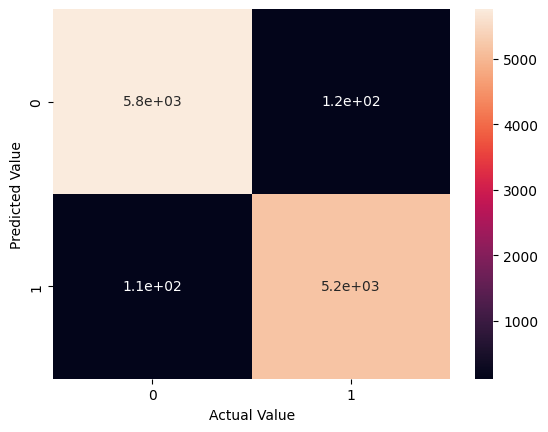

In [79]:
sns.heatmap (metrics.confusion_matrix(y_test, y_pred_svc), annot = True)
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

## K-Nearest Neighbors (KNN)

In [80]:
# Instantiate the KNN model
knn_model = KNeighborsClassifier()  # Create an instance of KNN with k=5 neighbors

# Train the KNN model
knn_model.fit(X_train_vectors_padded, y_train)  # Fit the KNN model on the training data

# Predict on test data
y_pred_knn = knn_model.predict(X_test_vectors_padded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, pos_label=0)
recall = recall_score(y_test, y_pred_knn, pos_label=0)
f1score = f1_score(y_test, y_pred_knn, pos_label=0)

# Create a new DataFrame with the metrics
new_row = pd.DataFrame({'model': ['KNN'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1score': [f1score]})

# Append the new row to the existing DataFrame
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

# Count the classification results
fake_count = np.sum(y_pred_knn == 0)
true_count = np.sum(y_pred_knn == 1)

# Create a new DataFrame with the test data classification counts
test_new_row = pd.DataFrame({'classification model': ['KNN'],
                             'fake': [fake_count],
                             'true': [true_count]})

# Append the new row to the existing DataFrame of test data
test_data_df = pd.concat([test_data_df, test_new_row], ignore_index=True)

In [81]:
report_knn = metrics.classification_report(y_test, y_pred_knn)
print("Classification Report:\n", report_knn)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      5877
           1       0.92      0.97      0.95      5291

    accuracy                           0.95     11168
   macro avg       0.95      0.95      0.95     11168
weighted avg       0.95      0.95      0.95     11168



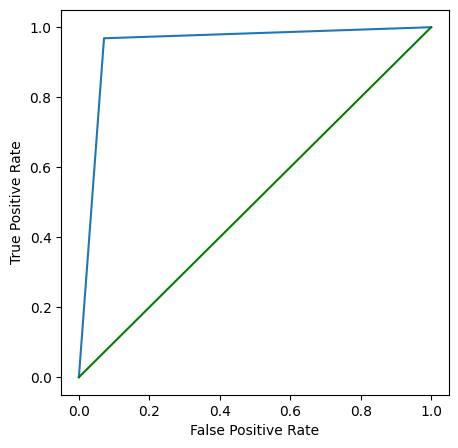

In [82]:
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_pred)

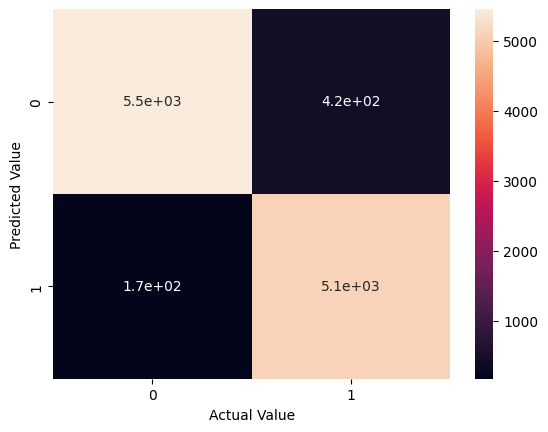

In [83]:
sns.heatmap (metrics.confusion_matrix(y_test, y_pred_knn), annot = True)
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

# Test Data

In [84]:
test_data_df

,classification model,fake,true
0,Logistic Regression,5866,5302
1,Decision Tree,5574,5594
2,Naive Bayes,5693,5475
3,XGBoost,5853,5315
4,SVM,5871,5297
5,KNN,5625,5543


# Model Comparision

In [85]:
evaluation_df

,model,accuracy,precision,recall,f1score
0,LR,0.977883,0.979884,0.978050,0.978966
1,DT,0.901594,0.928597,0.880721,0.904026
2,NB,0.893446,0.911646,0.883104,0.897148
3,XGB,0.970451,0.973860,0.969883,0.971867
4,SVM,0.979585,0.981094,0.980092,0.980592
5,KNN,0.947529,0.970311,0.928705,0.949052


In [86]:
#df_sorted_desc = df.sort_values(by='A', ascending=False)
model_df= evaluation_df.sort_values(by = 'precision', ascending=False)
model_df

,model,accuracy,precision,recall,f1score
4,SVM,0.979585,0.981094,0.980092,0.980592
0,LR,0.977883,0.979884,0.978050,0.978966
3,XGB,0.970451,0.973860,0.969883,0.971867
5,KNN,0.947529,0.970311,0.928705,0.949052
1,DT,0.901594,0.928597,0.880721,0.904026
2,NB,0.893446,0.911646,0.883104,0.897148


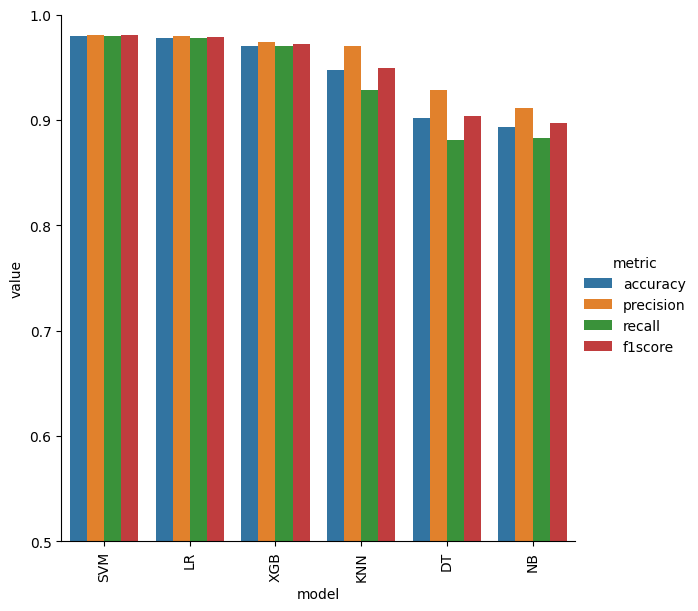

In [87]:
# Reshape the DataFrame to have 'model' as a column
model_df_melted = pd.melt(model_df, id_vars=['model'], var_name='metric', value_name='value')

# Plot using seaborn catplot
sns.catplot(x='model', y='value', hue='metric', data=model_df_melted, kind='bar', height=6)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

# Manual testing

## LR

In [88]:
def manual_testing_lr(text):
    clean_text = wordopt(text)
    tokens = word_tokenize(clean_text)
    avg_vector = get_average_vector(tokens, w2v_model, 200)
    padded_vector = pad_sequences([avg_vector], maxlen=max_length, dtype='float32', padding='post')

    # Predict using the logistic regression model
    prob_lr = logreg.predict_proba(padded_vector)[0][1]  # Probability for class 1
    prediction_lr = 1 if prob_lr > 0.5 else 0

    # Output the result
    if prediction_lr == 1:
        print("The text is predicted to be: Fake")
    else:
        print("The text is predicted to be: Real")

In [89]:
sample_text = """Several passengers faced inconvenience as flight operations were suspended at the Kolkata airport for 21 hours in the wake of cyclone 'Remal'.

Representative Image: Passengers face inconvenience as Kolkata Airport suspends flight operations amid cyclone 'Remal' scare.
Representative Image: Passengers face inconvenience as Kolkata Airport suspends flight operations amid cyclone 'Remal' scare.

Passengers complained that the airlines did not inform them about the cancellation of their flights through email or registered phone number. Some of them demanded hotel costs and food allowance from the airline.

Unlock exclusive access to the latest news on India's general elections, only on the HT App. Download Now! Download Now!
Follow: Cyclone Remal LIVE Updates

Arnab Tarafdar, one of the relatives of the passenger, who had come to the airport to drop off her grandmother, Meera Nandi complained that her grandmother, who is an aged woman, was asked to wait and then informed about the cancellation of her flight.

ALSO READ- Remal intensifies into ‘severe cyclonic storm’, landfall tonight

"My grandmother (Meera Nandi) was asked to wait. After some time she was called to the counter and said that the flight was overbooked and she would not get a seat. She was asked to come tomorrow because all flights later in the day have been cancelled owing to the cyclone. She is an aged woman. Now she has to go back and come again tomorrow," Arnab Tarafdar said speaking to ANI.


Another passenger, Avinash Talukdar said that he had checked out of his hotel at 5 am and came to the airport only to know that his flight had been cancelled. Talukdar demanded hotel costs and food allowance from his airline and is also exploring legal ways to make such demands.

ALSO READ- How Cyclone 'Remal' got its name and what it means

"We had a flight to Guwahati at 8:30 am. They said the flight had been cancelled owing to the cyclone. They did not drop a text or call us. I have checked out from my hotel at 5 am and I have come here. They should have informed us through email or message. They said that the next flight is on May 28. Where shall we roam in these two days? Our flight has been rescheduled for May 28 without even asking us. They just asked us to get out of the airport. We want hotel costs and allowance for food. We are searching on the web whether we can take demand such costs legally." Talukdar told ANI.


Another passenger, Himadri Das whose flight was also cancelled said, "We had come here from Guwahati for medical reasons. We have an important work at Guwahati for which we were supposed to leave today. But we were not allowed to fly owing the the cyclone. We did not receive any information about this. Our flight was at 8:30 and we came here at 6. We did not receive any mail, or any message at our registered number."

"This was not expected from Indigo. We have travelled by Indigo several times and it has always been a good experience. We do not have any accommodation here. They rescheduled it themselves, that too on May 28. We will see what can be done lawfully," she added.


According to the Kolkata Airport Authority, a total of 394 flights that were scheduled for arrival or departure including domestic and international have been suspended from Sunday noon to Monday 9 am. This includes 170 domestic tentative departures and 26 international tentative arrivals, officials said.

Cyclone Remal is forecasted to significantly impact the coastal region of West Bengal, including the city of Kolkata."""

In [90]:
manual_testing_lr(sample_text)

The text is predicted to be: Real


## DT

In [91]:
def manual_testing_dt(text):
    clean_text = wordopt(text)
    tokens = word_tokenize(clean_text)
    avg_vector = get_average_vector(tokens, w2v_model, 200)
    padded_vector = pad_sequences([avg_vector], maxlen=max_length, dtype='float32', padding='post')

    # Predict using the decision tree classifier
    prediction_dt = dt.predict(padded_vector)[0]

    # Output the result
    if prediction_dt == 1:
        print("The text is predicted to be: Fake")
    else:
        print("The text is predicted to be: Real")

In [92]:
sample_text = """Several passengers faced inconvenience as flight operations were suspended at the Kolkata airport for 21 hours in the wake of cyclone 'Remal'.

Representative Image: Passengers face inconvenience as Kolkata Airport suspends flight operations amid cyclone 'Remal' scare.
Representative Image: Passengers face inconvenience as Kolkata Airport suspends flight operations amid cyclone 'Remal' scare.

Passengers complained that the airlines did not inform them about the cancellation of their flights through email or registered phone number. Some of them demanded hotel costs and food allowance from the airline.

Unlock exclusive access to the latest news on India's general elections, only on the HT App. Download Now! Download Now!
Follow: Cyclone Remal LIVE Updates

Arnab Tarafdar, one of the relatives of the passenger, who had come to the airport to drop off her grandmother, Meera Nandi complained that her grandmother, who is an aged woman, was asked to wait and then informed about the cancellation of her flight.

ALSO READ- Remal intensifies into ‘severe cyclonic storm’, landfall tonight

"My grandmother (Meera Nandi) was asked to wait. After some time she was called to the counter and said that the flight was overbooked and she would not get a seat. She was asked to come tomorrow because all flights later in the day have been cancelled owing to the cyclone. She is an aged woman. Now she has to go back and come again tomorrow," Arnab Tarafdar said speaking to ANI.


Another passenger, Avinash Talukdar said that he had checked out of his hotel at 5 am and came to the airport only to know that his flight had been cancelled. Talukdar demanded hotel costs and food allowance from his airline and is also exploring legal ways to make such demands.

ALSO READ- How Cyclone 'Remal' got its name and what it means

"We had a flight to Guwahati at 8:30 am. They said the flight had been cancelled owing to the cyclone. They did not drop a text or call us. I have checked out from my hotel at 5 am and I have come here. They should have informed us through email or message. They said that the next flight is on May 28. Where shall we roam in these two days? Our flight has been rescheduled for May 28 without even asking us. They just asked us to get out of the airport. We want hotel costs and allowance for food. We are searching on the web whether we can take demand such costs legally." Talukdar told ANI.


Another passenger, Himadri Das whose flight was also cancelled said, "We had come here from Guwahati for medical reasons. We have an important work at Guwahati for which we were supposed to leave today. But we were not allowed to fly owing the the cyclone. We did not receive any information about this. Our flight was at 8:30 and we came here at 6. We did not receive any mail, or any message at our registered number."

"This was not expected from Indigo. We have travelled by Indigo several times and it has always been a good experience. We do not have any accommodation here. They rescheduled it themselves, that too on May 28. We will see what can be done lawfully," she added.


According to the Kolkata Airport Authority, a total of 394 flights that were scheduled for arrival or departure including domestic and international have been suspended from Sunday noon to Monday 9 am. This includes 170 domestic tentative departures and 26 international tentative arrivals, officials said.

Cyclone Remal is forecasted to significantly impact the coastal region of West Bengal, including the city of Kolkata."""

In [93]:
manual_testing_dt(sample_text)

The text is predicted to be: Real


## NB

In [94]:
def manual_testing_nb(text):
    clean_text = wordopt(text)
    tokens = word_tokenize(clean_text)
    avg_vector = get_average_vector(tokens, w2v_model, 200)
    padded_vector = pad_sequences([avg_vector], maxlen=max_length, dtype='float32', padding='post')

    # Predict using the Bernoulli Naive Bayes classifier
    prediction_nb = bnb.predict(padded_vector)[0]

    # Output the result
    if prediction_nb == 1:
        print("The text is predicted to be: Fake")
    else:
        print("The text is predicted to be: Real")

In [95]:
sample_text = """Several passengers faced inconvenience as flight operations were suspended at the Kolkata airport for 21 hours in the wake of cyclone 'Remal'.

Representative Image: Passengers face inconvenience as Kolkata Airport suspends flight operations amid cyclone 'Remal' scare.
Representative Image: Passengers face inconvenience as Kolkata Airport suspends flight operations amid cyclone 'Remal' scare.

Passengers complained that the airlines did not inform them about the cancellation of their flights through email or registered phone number. Some of them demanded hotel costs and food allowance from the airline.

Unlock exclusive access to the latest news on India's general elections, only on the HT App. Download Now! Download Now!
Follow: Cyclone Remal LIVE Updates

Arnab Tarafdar, one of the relatives of the passenger, who had come to the airport to drop off her grandmother, Meera Nandi complained that her grandmother, who is an aged woman, was asked to wait and then informed about the cancellation of her flight.

ALSO READ- Remal intensifies into ‘severe cyclonic storm’, landfall tonight

"My grandmother (Meera Nandi) was asked to wait. After some time she was called to the counter and said that the flight was overbooked and she would not get a seat. She was asked to come tomorrow because all flights later in the day have been cancelled owing to the cyclone. She is an aged woman. Now she has to go back and come again tomorrow," Arnab Tarafdar said speaking to ANI.


Another passenger, Avinash Talukdar said that he had checked out of his hotel at 5 am and came to the airport only to know that his flight had been cancelled. Talukdar demanded hotel costs and food allowance from his airline and is also exploring legal ways to make such demands.

ALSO READ- How Cyclone 'Remal' got its name and what it means

"We had a flight to Guwahati at 8:30 am. They said the flight had been cancelled owing to the cyclone. They did not drop a text or call us. I have checked out from my hotel at 5 am and I have come here. They should have informed us through email or message. They said that the next flight is on May 28. Where shall we roam in these two days? Our flight has been rescheduled for May 28 without even asking us. They just asked us to get out of the airport. We want hotel costs and allowance for food. We are searching on the web whether we can take demand such costs legally." Talukdar told ANI.


Another passenger, Himadri Das whose flight was also cancelled said, "We had come here from Guwahati for medical reasons. We have an important work at Guwahati for which we were supposed to leave today. But we were not allowed to fly owing the the cyclone. We did not receive any information about this. Our flight was at 8:30 and we came here at 6. We did not receive any mail, or any message at our registered number."

"This was not expected from Indigo. We have travelled by Indigo several times and it has always been a good experience. We do not have any accommodation here. They rescheduled it themselves, that too on May 28. We will see what can be done lawfully," she added.


According to the Kolkata Airport Authority, a total of 394 flights that were scheduled for arrival or departure including domestic and international have been suspended from Sunday noon to Monday 9 am. This includes 170 domestic tentative departures and 26 international tentative arrivals, officials said.

Cyclone Remal is forecasted to significantly impact the coastal region of West Bengal, including the city of Kolkata."""

In [96]:
manual_testing_nb(sample_text)

The text is predicted to be: Fake


## XGBoost

In [97]:
def manual_testing_xgb(text):
    clean_text = wordopt(text)
    tokens = word_tokenize(clean_text)
    avg_vector = get_average_vector(tokens, w2v_model, 200)
    padded_vector = pad_sequences([avg_vector], maxlen=max_length, dtype='float32', padding='post')

    # Convert the padded vector to DMatrix format for XGBoost
    dtest = xgb.DMatrix(data=padded_vector)

    # Predict using the XGBoost model
    prob_xgb = bst.predict(dtest)[0]  # Probability for class 1
    prediction_xgb = 1 if prob_xgb > 0.5 else 0

    # Output the result
    if prediction_xgb == 1:
        print("The text is predicted to be: Fake")
    else:
        print("The text is predicted to be: Real")

In [98]:
sample_text = """Several passengers faced inconvenience as flight operations were suspended at the Kolkata airport for 21 hours in the wake of cyclone 'Remal'.

Representative Image: Passengers face inconvenience as Kolkata Airport suspends flight operations amid cyclone 'Remal' scare.
Representative Image: Passengers face inconvenience as Kolkata Airport suspends flight operations amid cyclone 'Remal' scare.

Passengers complained that the airlines did not inform them about the cancellation of their flights through email or registered phone number. Some of them demanded hotel costs and food allowance from the airline.

Unlock exclusive access to the latest news on India's general elections, only on the HT App. Download Now! Download Now!
Follow: Cyclone Remal LIVE Updates

Arnab Tarafdar, one of the relatives of the passenger, who had come to the airport to drop off her grandmother, Meera Nandi complained that her grandmother, who is an aged woman, was asked to wait and then informed about the cancellation of her flight.

ALSO READ- Remal intensifies into ‘severe cyclonic storm’, landfall tonight

"My grandmother (Meera Nandi) was asked to wait. After some time she was called to the counter and said that the flight was overbooked and she would not get a seat. She was asked to come tomorrow because all flights later in the day have been cancelled owing to the cyclone. She is an aged woman. Now she has to go back and come again tomorrow," Arnab Tarafdar said speaking to ANI.


Another passenger, Avinash Talukdar said that he had checked out of his hotel at 5 am and came to the airport only to know that his flight had been cancelled. Talukdar demanded hotel costs and food allowance from his airline and is also exploring legal ways to make such demands.

ALSO READ- How Cyclone 'Remal' got its name and what it means

"We had a flight to Guwahati at 8:30 am. They said the flight had been cancelled owing to the cyclone. They did not drop a text or call us. I have checked out from my hotel at 5 am and I have come here. They should have informed us through email or message. They said that the next flight is on May 28. Where shall we roam in these two days? Our flight has been rescheduled for May 28 without even asking us. They just asked us to get out of the airport. We want hotel costs and allowance for food. We are searching on the web whether we can take demand such costs legally." Talukdar told ANI.


Another passenger, Himadri Das whose flight was also cancelled said, "We had come here from Guwahati for medical reasons. We have an important work at Guwahati for which we were supposed to leave today. But we were not allowed to fly owing the the cyclone. We did not receive any information about this. Our flight was at 8:30 and we came here at 6. We did not receive any mail, or any message at our registered number."

"This was not expected from Indigo. We have travelled by Indigo several times and it has always been a good experience. We do not have any accommodation here. They rescheduled it themselves, that too on May 28. We will see what can be done lawfully," she added.


According to the Kolkata Airport Authority, a total of 394 flights that were scheduled for arrival or departure including domestic and international have been suspended from Sunday noon to Monday 9 am. This includes 170 domestic tentative departures and 26 international tentative arrivals, officials said.

Cyclone Remal is forecasted to significantly impact the coastal region of West Bengal, including the city of Kolkata."""

In [99]:
manual_testing_xgb(sample_text)

The text is predicted to be: Real


## SVM

In [100]:
def manual_testing_svm(text):
    clean_text = wordopt(text)
    tokens = word_tokenize(clean_text)
    avg_vector = get_average_vector(tokens, w2v_model, 200)
    padded_vector = pad_sequences([avg_vector], maxlen=max_length, dtype='float32', padding='post')

    # Predict using the SVM model
    pred_svm = svc.predict(padded_vector)

    # Output the result
    if pred_svm == 1:
        print("The text is predicted to be: Fake")
    else:
        print("The text is predicted to be: Real")


In [112]:
sample_text = """A senior Hamas official urged the United States on Monday to pressure Israel to end the war in Gaza. Sami Abu Zuhri's appeal to the United States came ahead of U.S. State Secretary Antony Blinken's visit to Israel to push the latest ceasefire plan proposed by the U.S. President Joe Biden on May 31. Meanwhile, in a fresh escalation, the IDF claimed Israeli fighter jets struck Hamas militants in Gaza. The IDF said some of them were Hamas' elite Nukhba force fighters. Watch this video to know more."""

In [113]:
manual_testing_svm(sample_text)

The text is predicted to be: Fake


## KNN

In [103]:
def manual_testing_knn(text):
    clean_text = wordopt(text)
    tokens = word_tokenize(clean_text)
    avg_vector = get_average_vector(tokens, w2v_model, 200)
    padded_vector = pad_sequences([avg_vector], maxlen=max_length, dtype='float32', padding='post')

    # Predict using the KNN model
    prob_knn = knn_model.predict_proba(padded_vector)[0][1]  # Probability for class 1
    prediction_knn = 1 if prob_knn > 0.5 else 0

    # Output the result
    if prediction_knn == 1:
        print("The text is predicted to be: Fake")
    else:
        print("The text is predicted to be: Real")

In [104]:
sample_text = """Several passengers faced inconvenience as flight operations were suspended at the Kolkata airport for 21 hours in the wake of cyclone 'Remal'.

Representative Image: Passengers face inconvenience as Kolkata Airport suspends flight operations amid cyclone 'Remal' scare.
Representative Image: Passengers face inconvenience as Kolkata Airport suspends flight operations amid cyclone 'Remal' scare.

Passengers complained that the airlines did not inform them about the cancellation of their flights through email or registered phone number. Some of them demanded hotel costs and food allowance from the airline.

Unlock exclusive access to the latest news on India's general elections, only on the HT App. Download Now! Download Now!
Follow: Cyclone Remal LIVE Updates

Arnab Tarafdar, one of the relatives of the passenger, who had come to the airport to drop off her grandmother, Meera Nandi complained that her grandmother, who is an aged woman, was asked to wait and then informed about the cancellation of her flight.

ALSO READ- Remal intensifies into ‘severe cyclonic storm’, landfall tonight

"My grandmother (Meera Nandi) was asked to wait. After some time she was called to the counter and said that the flight was overbooked and she would not get a seat. She was asked to come tomorrow because all flights later in the day have been cancelled owing to the cyclone. She is an aged woman. Now she has to go back and come again tomorrow," Arnab Tarafdar said speaking to ANI.


Another passenger, Avinash Talukdar said that he had checked out of his hotel at 5 am and came to the airport only to know that his flight had been cancelled. Talukdar demanded hotel costs and food allowance from his airline and is also exploring legal ways to make such demands.

ALSO READ- How Cyclone 'Remal' got its name and what it means

"We had a flight to Guwahati at 8:30 am. They said the flight had been cancelled owing to the cyclone. They did not drop a text or call us. I have checked out from my hotel at 5 am and I have come here. They should have informed us through email or message. They said that the next flight is on May 28. Where shall we roam in these two days? Our flight has been rescheduled for May 28 without even asking us. They just asked us to get out of the airport. We want hotel costs and allowance for food. We are searching on the web whether we can take demand such costs legally." Talukdar told ANI.


Another passenger, Himadri Das whose flight was also cancelled said, "We had come here from Guwahati for medical reasons. We have an important work at Guwahati for which we were supposed to leave today. But we were not allowed to fly owing the the cyclone. We did not receive any information about this. Our flight was at 8:30 and we came here at 6. We did not receive any mail, or any message at our registered number."

"This was not expected from Indigo. We have travelled by Indigo several times and it has always been a good experience. We do not have any accommodation here. They rescheduled it themselves, that too on May 28. We will see what can be done lawfully," she added.


According to the Kolkata Airport Authority, a total of 394 flights that were scheduled for arrival or departure including domestic and international have been suspended from Sunday noon to Monday 9 am. This includes 170 domestic tentative departures and 26 international tentative arrivals, officials said.

Cyclone Remal is forecasted to significantly impact the coastal region of West Bengal, including the city of Kolkata."""

In [105]:
manual_testing_knn(sample_text)

The text is predicted to be: Fake


# Export model

In [106]:
import pickle

In [107]:
path = '/content/drive/MyDrive/fake_news_detection/word2vec_google_news.pkl'

# Save the Word2Vec model
with open(path, "wb") as f:
    pickle.dump(wv, f)

In [108]:
# Pickle the SVM data
path = '/content/drive/MyDrive/fake_news_detection/svm_model.pkl'
with open(path, "wb") as f:
    pickle.dump(svm_model, f)

# Deployment

In [109]:
## Gradio

In [110]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.5 MB/s et

In [115]:
import gradio as gr

def manual_testing_svm_gradio(text):
    clean_text = wordopt(text)
    tokens = word_tokenize(clean_text)
    avg_vector = get_average_vector(tokens, w2v_model, 200)
    padded_vector = pad_sequences([avg_vector], maxlen=max_length, dtype='float32', padding='post')

    # Predict using the SVM model
    pred_svm = svc.predict(padded_vector)

    # Output the result
    if pred_svm == 1:
        return "The article is predicted to be: Fake"
    else:
        return "The article is predicted to be: Real"

# Create the Gradio interface using updated API
interface = gr.Interface(
    fn=manual_testing_svm_gradio,  # Function to be called on user input
    inputs=gr.Textbox(lines=5, placeholder="Enter an article here..."),  # Textbox input
    outputs=gr.Label(),  # Output will be a label showing "Fake" or "Real"
    title="Fake News Detection System",  # Title of the interface
    description="Enter an article to classify it as Fake or Real."
)

# Launch the interface
interface.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ed968ea9fe2674a2dd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
